In [1]:
import cv2
import numpy as np

# Images

In [2]:
img = cv2.imread('./pic.jpg')

In [3]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 83  55  54]
  [ 83  55  54]
  [ 83  55  54]
  ...
  [ 76  50  50]
  [ 78  50  50]
  [ 78  50  50]]

 [[ 56  35  33]
  [ 56  35  33]
  [ 56  35  33]
  ...
  [ 51  30  29]
  [ 53  29  29]
  [ 53  29  29]]

 [[ 23   4   1]
  [ 23   4   1]
  [ 23   4   1]
  ...
  [ 25   5   4]
  [ 26   5   4]
  [ 26   5   4]]]


In [12]:
cv2.imshow("original",img)
cv2.waitKey(3000)  # it takes the time for which images hould be on screen , if we give 0 or does not give anything then it will be on screen till the time till we dont click on cross
cv2.destroyAllWindows()

In [5]:
img = cv2.resize(img,(200,200)) # (width,height)

In [6]:
bw_img = cv2.imread("./pic.jpg",0)  # it will generate graysacle image

In [26]:
bw_img = cv2.flip(bw_img,0)     # 0 -> rotate 90 , 1-> rotate 180 , -1 -> rotate 270
cv2.imshow("bw_original",bw_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
cv2.imshow("original",img)
k = cv2.waitKey()       
if k == ord("s"):       # if user press 's' then save it
    cv2.imwrite(r"C:\Users\tusha\Desktop\Computer vision\output.jpg",img)   # function for saving image
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows()

# Videos

In [13]:
cap = cv2.VideoCapture("./video.mp4")
print(cap)
while True:
    ret,frame = cap.read()  # cap gives two variables one is binary which we have stored in ret and another is image which we have stored in frame
    frame = cv2.resize(frame,(700,250))
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)   # convert video to grayscale
    cv2.imshow("frame",gray)
    k = cv2.waitKey(25)     # more value of waitkey will slow the frame speed (25 is normal playback)
    if k == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

< cv2.VideoCapture 000001FA48EFE5D0>


### using webcam and saving video

In [19]:
cap = cv2.VideoCapture(0)  # pass 0 to access webcam
fourcc = cv2.VideoWriter_fourcc(*"XVID")    # it tells the video format
output = cv2.VideoWriter("output.avi",fourcc,20.0,(1000,700))   # it saves video (filename,format,fps,framesize)
while True:
    ret,frame = cap.read()  
    frame = cv2.resize(frame,(1000,700))
    cv2.imshow("frame",frame)
    output.write(frame)
    k = cv2.waitKey(25)    
    if k == ord("q"):
        break
cap.release()
output.release()
cv2.destroyAllWindows()

### using mobile

In [20]:
camera = "http://192.168.29.53:8080/video"
cap = cv2.VideoCapture(0)
cap.open(camera)
fourcc = cv2.VideoWriter_fourcc(*"XVID")
output = cv2.VideoWriter("output_mobile.avi",fourcc,20.0,(1000,700))
while True:
    ret,frame = cap.read()  
    frame = cv2.resize(frame,(1000,700))
    cv2.imshow("frame",frame)
    output.write(frame)
    k = cv2.waitKey(5)    
    if k == ord("q"):
        break
cap.release()
output.release()
cv2.destroyAllWindows()

### capturing online videos

In [ ]:
import pafy
url = "https://www.youtube.com/watch?v=wIAs97ynODo&list=PLaHodugB5x-Ddy_H951h0VHjOjfzZNCBh&index=7"
cap = cv2.VideoCapture(0)
data = pafy.new(url)
data = data.getbest(preftype="mp4")
cap.open(data.url)
fourcc = cv2.VideoWriter_fourcc(*"XVID")
output = cv2.VideoWriter("output_online.avi",fourcc,20.0,(1000,700))
while True:
    ret,frame = cap.read()  
    frame = cv2.resize(frame,(1000,700))
    cv2.imshow("frame",frame)
    output.write(frame)
    k = cv2.waitKey(5)    
    if k == ord("q"):
        break
cap.release()
output.release()
cv2.destroyAllWindows()

# Screen Recorder

In [27]:
!pip install pyautogui

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.2 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 435.7 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.2 kB 178.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 187.0 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 171.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: start

In [28]:
import pyautogui as p
import numpy as np

rs = p.size()
fn = input("Please enter any file name and Path")
forcc = cv2.VideoWriter_fourcc(*'XVID')
output = cv2.VideoWriter(fn,fourcc,60.0,rs)

cv2.namedWindow('Live_Recording',cv2.WINDOW_NORMAL)
cv2.resizeWindow('Live_Recording',(600,400))

while True:
    img = p.screenshot()
    f = np.array(img)
    f = cv2.cvtColor(f,cv2.COLOR_BGR2RGB)
    output.write(f)
    cv2.imshow("Live_Recording",f)
    if cv2.waitKey(1) == ord('q'):
        break

output.release()
cv2.destroyAllWindows()

# Break video into multiple images and store in folder

In [31]:
videocap = cv2.VideoCapture('video.mp4')
ret,image = videocap.read()
count = 0 
while True:
    if ret == True:
        cv2.imwrite(r"C:\Users\tusha\Desktop\Computer vision\frames\imgN%d.jpg"%count,image)
        videocap.set(cv2.CAP_PROP_POS_MSEC,(count**100))    # it helps in taking screenshots after set time
        ret,image = videocap.read()
        cv2.imshow("res",image)
        count+=1
        if cv2.waitKey(1)== ord('q'):
            break
            cv2.destroyAllWindows()
videocap.release()
cv2.destroyAllWindows()

# Drawing function in opencv

### on image

In [57]:
img = np.zeros([512,512,3],np.uint8)*255 # black screen
img = np.ones([512,512,3],np.uint8)*255  # white screen
# img = cv2.imread('pic.jpg')
img = cv2.line(img,(0,0),(200,200),(154,92,424),8)  # (img,staring,ending,color{BGR},thickness)
img = cv2.arrowedLine(img,(0,125),(255,255),(255,0,0),10)
img = cv2.rectangle(img,(325,225),(510,328),(255,255,0),-1) # if we take thickness as -1 then it will fill the shape
img = cv2.circle(img,(425,525),25,(0,0,255),-1) # it will take radius instead of ending
img = cv2.putText(img,'Tushar gupta',(20,500),cv2.FONT_ITALIC,2,(1,125,225),5,cv2.LINE_AA) #(img,text,starting,font,fontsize,color,thickness,linetype)
cv2.imshow("res",img)
cv2.waitKey()
cv2.destroyAllWindows()

### on video

In [62]:
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret,frame = cap.read()
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    frame = cv2.resize(frame,(1000,700))
    text = 'Height : '+ str(cap.get(4)) + ' Width : ' + str(cap.get(3))
    frame = cv2.putText(frame,text,(10,20),font,1,(0,0,0),1,cv2.LINE_AA)
    cv2.imshow('frame',frame)
    if cv2.waitKey(5)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Mouse callback functions

In [63]:
def draw(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(125,0,125),5)
    if event == cv2.EVENT_RBUTTONDBLCLK:
        cv2.rectangle(img,(x,y),(x+100,y+75),(125,125,125),2)

cv2.namedWindow(winname='res')
img = np.zeros([512,512,3],np.uint8)*255
cv2.setMouseCallback("res",draw)
while True:
    cv2.imshow("res",img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

### to see cord and color on different click

In [11]:
def mouse_event(event,x,y,flag,param):
    font  = cv2.FONT_HERSHEY_COMPLEX
    if event == cv2.EVENT_LBUTTONDOWN:
        cord = ". " + str(x) + " , " + str(y)
        cv2.putText(img,cord,(x,y),font,1,(155,125,100),2)
    if event == cv2.EVENT_RBUTTONDOWN:
        b = img[y,x,0] # for blue channel is 0
        g = img[y,x,1] # for green channel is 1
        r = img[y,x,2] # for red channel is 2
        color_bgr = ". " + str(b) + " , " + str(g) +" , " + str(r)
        cv2.putText(img,color_bgr,(x,y),font,1,(155,225,130),2)
cv2.namedWindow(winname='res')
img = cv2.imread('pic.jpg')
cv2.setMouseCallback("res",mouse_event)
while True:
    cv2.imshow("res",img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

# COLOR PICKER PROJECT

In [10]:
def cross(x):
    pass

img = np.zeros((300,512,3),np.uint8)
cv2.namedWindow("Color picker")

s1 = "0:OFF\n1:ON"
cv2.createTrackbar(s1,"Color picker",0,1,cross)

cv2.createTrackbar("R","Color picker",0,255,cross)
cv2.createTrackbar("G","Color picker",0,255,cross)
cv2.createTrackbar("B","Color picker",0,255,cross)

while True:
    cv2.imshow("Color picker",img)
    if cv2.waitKey(1) == ord('q'):
        break

    s = cv2.getTrackbarPos(s1,"Color picker")
    r = cv2.getTrackbarPos("R","Color picker")
    g = cv2.getTrackbarPos("G","Color picker")
    b = cv2.getTrackbarPos("B","Color picker")

    if s==0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

## merge and split

In [79]:
img = cv2.imread('./pic.jpg')
print('shape = ', img.shape)
print("no. of pixels = ", img.size)
print("datatype = ",img.dtype)
print("image type = ",type(img))

b,g,r = cv2.split(img)

cv2.imshow("blue",b)
cv2.imshow("green",g)
cv2.imshow("red",r)
cv2.imshow("image",img)

mr1 = cv2.merge((r,g,b))
cv2.imshow("rgb",mr1)

cv2.waitKey()
cv2.destroyAllWindows()

shape =  (694, 540, 3)
no. of pixels =  1124280
datatype =  uint8
image type =  <class 'numpy.ndarray'>


# Region of Interest

In [ ]:
img = cv2.imread("pic.jpg")
print(img.shape)
# (115,43)                      (398 ,380)

roi = img[45:380,115:400]      # (y1:y2,x1:x2)
# dy = 335 , dx = 285
img[24:380,401:500] = roi

cv2.imshow("image",img)
cv2.waitKey()
cv2.destroyAllWindows()

# Creating image border

In [6]:
img = cv2.imread("pic.jpg")
brdr = cv2.copyMakeBorder(img,10,10,5,5,cv2.BORDER_CONSTANT,value = [225,0,125]) # (image,border-width,border-type,value)
cv2.imshow("image",brdr)
cv2.waitKey()
cv2.destroyAllWindows()

# Image Blending

In [12]:
img1 = cv2.imread("pic.jpg")
img2 = cv2.imread("pic2.jpg")
img1 = cv2.resize(img1,(500,700))
img2 = cv2.resize(img2,(500,700))
# saturated blending
result = cv2.add(img1, img2)
# weighted blending 
result = cv2.addWeighted(img1,0.7,img2,0.3,0)   #(img1,weigt1,img2,weigt2,gamma)
cv2.imshow("res",result)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
import numpy as np
img1 = cv2.imread("pic.jpg")
img2 = cv2.imread("pic2.jpg")
img1 = cv2.resize(img1,(500,700))
img2 = cv2.resize(img2,(500,700))

def blend(x):
    pass

img = np.zeros((400,400,3),np.uint8)
cv2.namedWindow('win')
cv2.createTrackbar('alpha','win',1,100,blend)
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch,'win',0,1,blend)

while True:
    s = cv2.getTrackbarPos(switch,'win')
    a = cv2.getTrackbarPos('alpha','win')
    n = float(a/100)
    if s==0:
        dst = img[:]
    else:
        dst = cv2.addWeighted(img1,1-n,img2,n,0)
    cv2.imshow('dst',dst)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'win' in function 'cvGetTrackbarPos'


: 

# Bitwise operations

In [9]:
img1 = np.zeros((250,500,3),np.uint8)
img1 = cv2.rectangle(img1,(150,100),(200,250),(255,255,255),-1)
img2 = np.zeros((250,500,3),np.uint8)
img2 = cv2.rectangle(img2,(10,10),(170,190),(255,255,255),-1)
cv2.imshow("img1",img1)
cv2.imshow("img2",img2)

bitAnd = cv2.bitwise_and(img2,img1)
cv2.imshow("bitAnd",bitAnd)
bitOr = cv2.bitwise_or(img2,img1)
cv2.imshow("bitOr",bitOr)

cv2.waitKey()
cv2.destroyAllWindows()

# Object detection using HSV color space

In [14]:
frame = cv2.imread('pic.jpg')
while True:
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    u_v  = np.array([100,100,150])
    l_v  = np.array([0,0,100])
    mask = cv2.inRange(hsv,l_v,u_v)
    res = cv2.bitwise_and(frame,frame,mask=mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

In [4]:
# getting only color set on trackbar

frame = cv2.imread('pic.jpg')
def nothing(x):
    pass

cv2.namedWindow("Color Adjustments")
cv2.createTrackbar("Lower_H", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_S", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_V", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Upper_H", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_S", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_V", "Color Adjustments", 255, 255, nothing)


while True:
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos("Lower_H", "Color Adjustments")
    l_s = cv2.getTrackbarPos("Lower_S", "Color Adjustments")
    l_v = cv2.getTrackbarPos("Lower_V", "Color Adjustments")

    u_h = cv2.getTrackbarPos("Upper_H", "Color Adjustments")
    u_s = cv2.getTrackbarPos("Upper_S", "Color Adjustments")
    u_v = cv2.getTrackbarPos("Upper_V", "Color Adjustments")
    
    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()

In [5]:
# detecting color using webcan and trackbar
cap = cv2.VideoCapture(0)
def nothing(x):
    pass

cv2.namedWindow("Color Adjustments")
cv2.createTrackbar("Lower_H", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_S", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_V", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Upper_H", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_S", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_V", "Color Adjustments", 255, 255, nothing)


while True:
    _,frame = cap.read()
    frame = cv2.resize(frame,(400,400))
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos("Lower_H", "Color Adjustments")
    l_s = cv2.getTrackbarPos("Lower_S", "Color Adjustments")
    l_v = cv2.getTrackbarPos("Lower_V", "Color Adjustments")

    u_h = cv2.getTrackbarPos("Upper_H", "Color Adjustments")
    u_s = cv2.getTrackbarPos("Upper_S", "Color Adjustments")
    u_v = cv2.getTrackbarPos("Upper_V", "Color Adjustments")
    
    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()

# Thresholding

In [5]:
img = cv2.imread('pic.jpg')
# (img,start,end,function)
_,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY) # pixels having value less than 100 will be converted to 0 and rest converted to 255
_,th2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV) # inverse of above case
_,th3 = cv2.threshold(img,100,255,cv2.THRESH_TRUNC) # it will spread the start value and the value below start value remain as it is
_,th4 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO) # same for value above start value and the value below start value to 0
# cv2.imshow('img',img)
# cv2.imshow('thresh binary',th1)
# cv2.imshow('thresh binary inverse',th2)
# cv2.imshow('thresh truncate',th3)
cv2.imshow('thresh tozero',th4)
cv2.waitKey(0)
cv2.destroyAllWindows()

### adaptive thresholding decides how thresholding value is calculated

In [9]:
# (img,pixel thresh,max pixel thresh,method,function,no. of pixels,contact_mean)
img = cv2.imread('pic.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th1 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
cv2.imshow('gray',gray)
cv2.imshow('mean adaptive',th1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Roi using thresholding and bitwise operations

In [31]:
img1 = cv2.imread('Data/hero1.jpg')
img2 = cv2.imread('Data/strom_breaker.JPG')
img1 = cv2.resize(img1,(1024,650))
img2 = cv2.resize(img2,(600,650))

r,c,ch = img2.shape   # row ,col, channels
roi = img1[0:r,0:c]

img_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)  # creating mask for img2

_,mask = cv2.threshold(img_gray,50,255,cv2.THRESH_BINARY) # create mask using threshold

mask_inv = cv2.bitwise_not(mask)    # remove background

img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)    # put background on roi

img2_fg = cv2.bitwise_and(img2,img2,mask=mask) # taking masked region from original image

res = cv2.add(img1_bg,img2_fg)   # put img in ROI 

final = img1

final[0:r,0:c] = res

cv2.imshow('final',final)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Transformations
These are the operations that are based on image shape . it is performed on image shape. 
1. erosion - it erodes the boundaries of the foreground object
kernal slides through all the image and all the pixel from the orginal image consider 1 only if kernal's pixel is 1
2. Dilation - It is just opposite of erosion.Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’.So it inc. the white region in the image or size of foreground object in.Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object.
3. Opening - It is erosion followed by dilation
4. Closing - It is opposite of opening

In [7]:
img = cv2.imread('Data/col_balls.jpg',0)    # we will work on binary , i.e. , grayscale images
_,mask = cv2.threshold(img,230,255,cv2.THRESH_BINARY_INV)   # we have to keep background black and foreground white so we are using inv
kernal = np.ones((5,5),np.uint8)  # 5X5 kernal with full ones.
e = cv2.erode(mask,kernal) # we will now float the kernal on mask and make the edges of object more sharp with erosion

cv2.imshow("img",img)
cv2.imshow("mask",mask)
cv2.imshow("erosion",e)
cv2.waitKey(0)
cv2.destroyAllWindows()

erosion sharpens boundary very well but it increases the distortion (age beech mei khi black tha to usko aur black kr dia jbki usse white hona chahiye tha) between the object 
so thats why we use dilation

In [10]:
kernel = np.ones((4,4),np.uint8)
d = cv2.dilate(mask,kernel)
cv2.imshow("dilation",d)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img = cv2.imread('Data/col_balls.jpg',0)    
_,mask = cv2.threshold(img,230,255,cv2.THRESH_BINARY_INV)   
kernel = np.ones((3,3),np.uint8)
o = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel) 

cv2.imshow("img",img)
cv2.imshow("mask",mask)
cv2.imshow("opening",o)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
img = cv2.imread('Data/col_balls.jpg',0)    
_,mask = cv2.threshold(img,230,255,cv2.THRESH_BINARY_INV)   
kernel = np.ones((3,3),np.uint8)
c = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel) 

cv2.imshow("img",img)
cv2.imshow("mask",mask)
cv2.imshow("clsing",c)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Smoothing

In [30]:
img  = cv2.imread('Data/noisy.jpg')
cv2.imshow("original",img)

# filter 1
# this filter work like ,each output pixel is the mean of its kernal neighbor
# it is aka homogeneous filter int his all pixel contribute with equal weight
# kernal is a small shape or matrix which we can apply on image
# in this filter kernal is [(1/kernal(h,w))*kernal]
kernel = np.ones((5,5),np.float32)/25
h_filter = cv2.filter2D(img,-1,kernel)  # -1 is desired depth
cv2.imshow("homogeneous",h_filter)

# filter 2
# blur method or averaging
# takes the average of all the pixels under kernel area and
# replaces the central element with this average
blur = cv2.blur(img,(8,8))  # here we pass kernel size
cv2.imshow('blur',blur)

# filter 3
# gaussian filter
# here it using different weight kernel , in row as well as column
# mean side values are small then centre . It manages distance b/w value of pixel

gau = cv2.GaussianBlur(img,(5,5),0)  # here 0 is a sigma-x value
cv2.imshow("gaussian blur",gau)

# filter 4
# median filter 
# computes the median of all the pixels under the kernel window and the central
# pixel is replaced with this median value
# This is highly effective in removing salt-and-pepper noise (where there are white dots on black color)
# here kernel size must be odd except 1
med = cv2.medianBlur(img,5)
cv2.imshow('median blur',med)

# filter 5
# bilateral filter
# it is highly effective at noise removal while preserving edges
# it is slow as compare with other filters
# argument(img,neighbour_pixel_diameter,sigma_color,sigma_space)
bi_f = cv2.bilateralFilter(img,9,75,75)
cv2.imshow('bi_f',bi_f)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Image gradient
It is directional change in the color or intensity in an image. It is most important part to find information about image. Like finding edges within the images. There are various methods to find image gradient.All load images to grayscale.

In [11]:
img = cv2.imread('Data/building.jpg',0)
img = cv2.resize(img,(600,500))
cv2.imshow('img',img)

# Laplacian derivative
# (img,data_type for -ve val,ksize)
lap = cv2.Laplacian(img,cv2.CV_64F,ksize=3)
lap = np.uint8(np.absolute(lap))
cv2.imshow('lap',lap)

# Soble operation - 
# is just a Gaussian smoothing plus differentiation operation,
# so it is more resistant to noise
# this is use for x and y both
# (img,type for -val,x=1,y=0,ksize)
# Sobel X focus on vertical lines
# Sobel Y focus on horizontal lines
sobelX = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)  # x-direction
sobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)  # y-direction
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
cv2.imshow('sobelX',sobelX)
cv2.imshow('sobelY',sobelY)

sobelCombine = cv2.bitwise_or(sobelX,sobelY)
cv2.imshow('sobelCombine',sobelCombine)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Canny edge detection

In [18]:
img = cv2.imread('Data/building.jpg',0)
img = cv2.resize(img,(600,500))
cv2.imshow('img',img)

def nothing(x):
    pass

cv2.namedWindow('Canny')
cv2.createTrackbar("threshold","Canny",0,255,nothing)

while True:
    a = cv2.getTrackbarPos('threshold','Canny')
    res = cv2.Canny(img,a,255)
    cv2.imshow('Canny',res)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()

# Image Pyramid
We use it bcs sometimes we on same image but different resolutions and it vary image to image so in that case we create a set of images with different resolutions which is called a pyramid. it can also be used in blending images

In [20]:
img = cv2.imread('Data/building.jpg',0)
img = cv2.resize(img,(600,500))
cv2.imshow('img',img)

pd1 = cv2.pyrDown(img)  # x/2,y/2
pu1 = cv2.pyrUp(img)  # x*2,y*2
cv2.imshow('pd1',pd1)
cv2.imshow('pu1',pu1)

cv2.waitKey()
cv2.destroyAllWindows()

# Contours
These are curve joining all the countinous pointa having same color or intensity.FindCountour function manipulate original image so copy it before proceeding. it is like finding white object from black background.so you must turn image in white and background in black.

In [27]:
img = cv2.imread('Data/logo.jpg')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img1,70,255,cv2.THRESH_BINARY)

# findContour(img,contour_retrival_mode,method)
cnts,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# here cnts is a list of contours and each contour is an array with x,y
# hier variable called hierarchy and it contain image information

# drawContour(img,cnts,id of contour,color,thickness)
img = cv2.drawContours(img,cnts,-1,(176,10,15),2)

cv2.imshow('img',img)
cv2.imshow('b/w',img1)
cv2.imshow('thresh',thresh)



cv2.waitKey()
cv2.destroyAllWindows()

## Moment in contours

### Finding center 

In [6]:
img = cv2.imread('Data/shapes.png')
img = cv2.resize(img,(600,700))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img1,200,255,cv2.THRESH_BINARY_INV)

cnts,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img = cv2.drawContours(img,cnts,-1,(10,20,100),2)

for c in cnts:
    M  = cv2.moments(c)
    print(M)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.drawContours(img,[c],-1,(0,255,0),2)
    cv2.circle(img,(cx,cy),7,(255,255,255),-1)
    cv2.putText(img,"center",(cx-20,cy-20),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,255,255),2)

cv2.imshow('img',img)
cv2.imshow('b/w',img1)
cv2.imshow('thresh',thresh)

cv2.waitKey()
cv2.destroyAllWindows()

{'m00': 9217.5, 'm10': 3403082.5, 'm01': 4681369.5, 'm20': 1259863001.9166665, 'm11': 1728354771.875, 'm02': 2392045141.9166665, 'm30': 467687576127.35004, 'm21': 639823597838.9166, 'm12': 883141301256.1167, 'm03': 1229710560698.25, 'mu20': 3451773.0795361996, 'mu11': 2548.226098537445, 'mu02': 14478513.706170559, 'mu30': -90956.12762451172, 'mu21': -35536958.84927416, 'mu12': 447440.8199863434, 'mu03': 135761139.7307129, 'nu20': 0.04062711138489369, 'nu11': 2.9992430890933408e-05, 'nu02': 0.17041102513822776, 'nu30': -1.1150622076027715e-05, 'nu21': -0.00435659705628032, 'nu12': 5.485329702746838e-05, 'nu03': 0.016643421408587006}
{'m00': 12847.0, 'm10': 2868920.833333333, 'm01': 6550380.333333333, 'm20': 646016729.0, 'm11': 1462791759.4166665, 'm02': 3372663373.1666665, 'm30': 146652244442.35, 'm21': 329386608118.95, 'm12': 753161219371.1167, 'm03': 1753072509060.1, 'mu20': 5345229.978125215, 'mu11': -2870.034329175949, 'mu02': 32779936.463926315, 'mu30': 34915.1174621582, 'mu21': -7

### Contour area , approximation and Convex hull

In [3]:
img = cv2.imread('Data/shapes.png')
img = cv2.resize(img,(600,700))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img1,200,255,cv2.THRESH_BINARY_INV)

cnts,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img = cv2.drawContours(img,cnts,-1,(10,20,100),2)
for c in cnts:
    M  = cv2.moments(c)
    print(M)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    # find area of contour
    area = cv2.contourArea(c)
    print(area)

    # contour approx - it is used to approx shaoe with less number of vertices
    epsilon = 0.01 * cv2.arcLength(c,True)
    data = cv2.approxPolyDP(c,epsilon,True)

    # contout hell is used to provide proper contours convexity
    hull = cv2.convexHull(data)
    x,y,w,h = cv2.boundingRect(hull)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(125,10,20),5)
    
    cv2.drawContours(img,[c],-1,(0,255,0),2)
    cv2.circle(img,(cx,cy),7,(255,255,255),-1)
    cv2.putText(img,"center",(cx-20,cy-20),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,255,255),2)

cv2.imshow('img',img)
cv2.imshow('b/w',img1)
cv2.imshow('thresh',thresh)

cv2.waitKey()
cv2.destroyAllWindows()

{'m00': 9217.5, 'm10': 3403082.5, 'm01': 4681369.5, 'm20': 1259863001.9166665, 'm11': 1728354771.875, 'm02': 2392045141.9166665, 'm30': 467687576127.35004, 'm21': 639823597838.9166, 'm12': 883141301256.1167, 'm03': 1229710560698.25, 'mu20': 3451773.0795361996, 'mu11': 2548.226098537445, 'mu02': 14478513.706170559, 'mu30': -90956.12762451172, 'mu21': -35536958.84927416, 'mu12': 447440.8199863434, 'mu03': 135761139.7307129, 'nu20': 0.04062711138489369, 'nu11': 2.9992430890933408e-05, 'nu02': 0.17041102513822776, 'nu30': -1.1150622076027715e-05, 'nu21': -0.00435659705628032, 'nu12': 5.485329702746838e-05, 'nu03': 0.016643421408587006}
9217.5
{'m00': 12847.0, 'm10': 2868920.833333333, 'm01': 6550380.333333333, 'm20': 646016729.0, 'm11': 1462791759.4166665, 'm02': 3372663373.1666665, 'm30': 146652244442.35, 'm21': 329386608118.95, 'm12': 753161219371.1167, 'm03': 1753072509060.1, 'mu20': 5345229.978125215, 'mu11': -2870.034329175949, 'mu02': 32779936.463926315, 'mu30': 34915.1174621582, 'mu

# Hand detection using contours

In [9]:
img = cv2.imread('Data/hand.jpg')
img = cv2.resize(img,(600,700))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(img1,9)
ret,thresh = cv2.threshold(blur,240,255,cv2.THRESH_BINARY_INV)

cnts,hier = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,cnts,-1,(50,50,150),2)

for c in cnts:
    epsilon = 0.0001*cv2.arcLength(c,True)
    data = cv2.approxPolyDP(c,epsilon,True)

    hull = cv2.convexHull(data)
    
    cv2.drawContours(img,[c],-1,(50,50,150),2)
    cv2.drawContours(img,[hull],-1,(0,255,0),2)

# find convexity defect
hull2 = cv2.convexHull(cnts[0],returnPoints=False)
# defect returns an array which contain value [start_point,end_point,fathest_point,approx_point]
defect = cv2.convexityDefects(cnts[0],hull2)

# Extreme points 
# It means topmost, bottommost,rightmost,leftmost points of object

c_max = max(cnts,key=cv2.contourArea)

# determine the most extreme points along the contour
extLeft = tuple(c_max[c_max[:,:,0].argmin()][0])
extRight = tuple(c_max[c_max[:,:,0].argmax()][0])
extTop = tuple(c_max[c_max[:,:,1].argmin()][0])
extBot = tuple(c_max[c_max[:,:,1].argmax()][0])

# draw the outline of the object , then draw each of the extreme points ,
# where the leftmost is red,rightmost is green,topmost is blue,bottommost is teal

cv2.circle(img,extLeft,8,(255,0,255),-1)
cv2.circle(img,extRight,8,(0,125,255),-1)
cv2.circle(img,extTop,8,(255,10,0),-1)
cv2.circle(img,extBot,8,(19,152,152),-1)

for i in range(defect.shape[0]):
    s,e,f,d = defect[i,0]
    start = tuple(c[s][0])
    end = tuple(c[e][0])
    far = tuple(c[f][0])
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.imshow('gray',img1)
cv2.imshow('thresh',thresh)
cv2.waitKey()
cv2.destroyAllWindows()

# Contour detection using webcam

In [10]:
cap = cv2.VideoCapture(0)
def nothing(x):
    pass

cv2.namedWindow('Color Adjustments',cv2.WINDOW_NORMAL)
cv2.resizeWindow('Color Adjustments',(300,300))
cv2.createTrackbar('Thresh','Color Adjustments',0,255,nothing)

cv2.createTrackbar("Lower_H", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_S", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_V", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Upper_H", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_S", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_V", "Color Adjustments", 255, 255, nothing)

while True:
    _,frame = cap.read()
    frame = cv2.resize(frame,(400,400))
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("Lower_H", "Color Adjustments")
    l_s = cv2.getTrackbarPos("Lower_S", "Color Adjustments")
    l_v = cv2.getTrackbarPos("Lower_V", "Color Adjustments")

    u_h = cv2.getTrackbarPos("Upper_H", "Color Adjustments")
    u_s = cv2.getTrackbarPos("Upper_S", "Color Adjustments")
    u_v = cv2.getTrackbarPos("Upper_V", "Color Adjustments")
    
    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv,lower_bound,upper_bound)
    filter = cv2.bitwise_and(frame,frame,mask=mask)

    mask1 = cv2.bitwise_not(mask)
    m_g = cv2.getTrackbarPos("Thresh", "Color Adjustments")
    ret,thresh = cv2.threshold(mask1,m_g,255,cv2.THRESH_BINARY)
    dilata = cv2.dilate(thresh,(1,1),iterations=6)

    cnts,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for c in cnts:
        epsilon = 0.0001*cv2.arcLength(c,True)
        data = cv2.approxPolyDP(c,epsilon,True)

        hull = cv2.convexHull(data)
        cv2.drawContours(frame,[c],-1,(50,50,150),2)
        cv2.drawContours(frame,[hull],-1,(0,255,0),2)

        hull = cv2.convexHull(data,returnPoints=False)
        defect = cv2.convexityDefects(data[0],hull)

    cv2.imshow("Thresh",thresh)
    cv2.imshow('mask',mask)
    cv2.imshow('filter',filter)
    cv2.imshow('Result',frame)

    if cv2.waitKey(1)==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Image Histogram
extract information about contrast , brightness and intensity. 
x-axis contain range of color value.
y-axis contain number of pixels in image.

## black and white

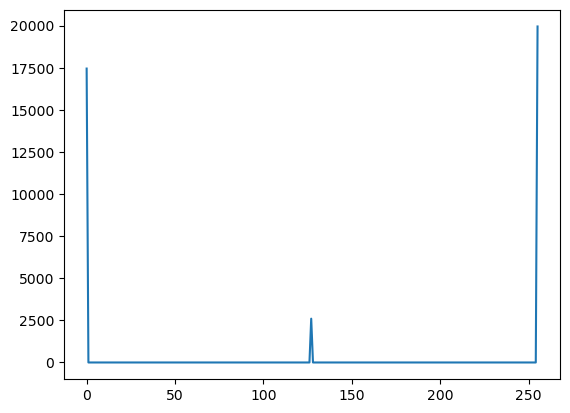

In [6]:
from matplotlib import pyplot as plt

img = np.zeros((200,200),np.uint8)

cv2.rectangle(img,(0,100),(200,200),(255),-1)
cv2.rectangle(img,(0,50),(50,100),(127),-1)

# ([img],[channel],mask,[histsize],range[0-255])
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)
plt.show()

cv2.imshow('res',img)
cv2.waitKey()
cv2.destroyAllWindows()

## colorfull

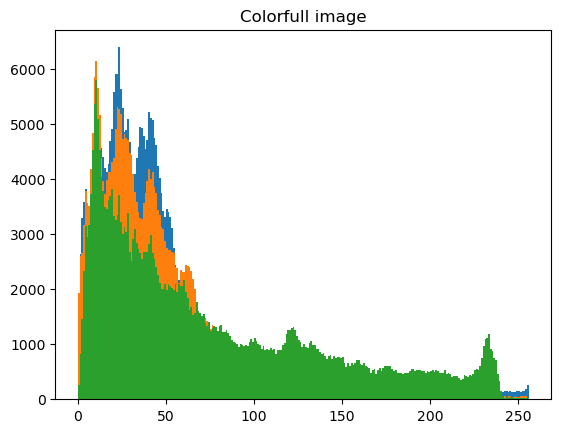

In [7]:
from matplotlib import pyplot as plt

img = cv2.imread('Data/thor.jpg')
img = cv2.resize(img,(500,650))

b,g,r = cv2.split(img)
cv2.imshow('img',img)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])

plt.title('Colorfull image')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

## grayscale

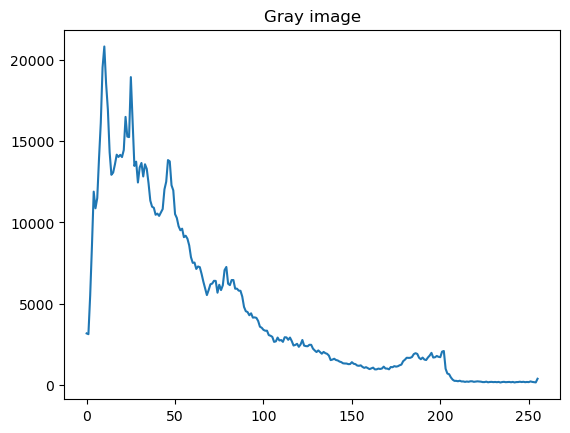

In [3]:
from matplotlib import pyplot as plt

img = cv2.imread('Data/thor.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('Gray image')
plt.show()

## Histogram equalization
It is good when size of the image is confined to a particular region.It accepts grayscale images only

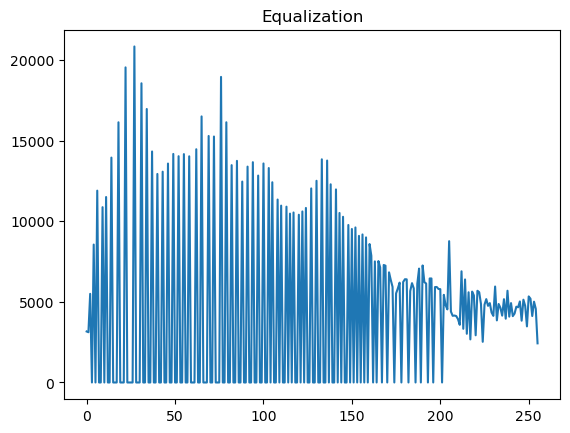

In [4]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))      # stacking images side by side
cv2.imshow('equ',res)
hist = cv2.calcHist([equ],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('Equalization')
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)
create a CLAHE object . It is used to enchance image and also handle noise from image region. It accepts only grayscale images.

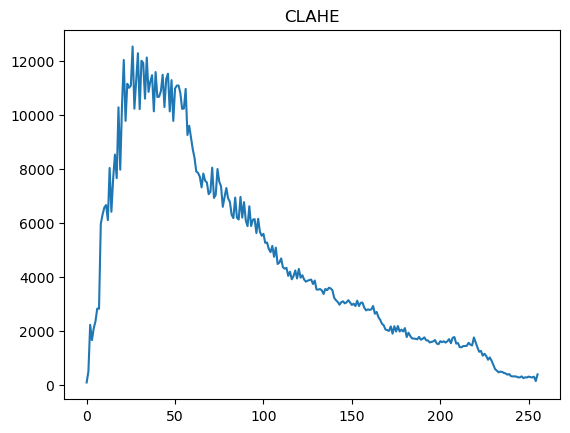

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
cl = clahe.apply(img)
cv2.imshow('clahe',cl)
hist = cv2.calcHist([cl],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('CLAHE')
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

# Removing bakground from image using histogram

In [9]:
original_img = cv2.imread('Data/green.jpg')
original_img = cv2.resize(original_img,(600,650))
hsv_original = cv2.cvtColor(original_img,cv2.COLOR_BGR2HSV)

roi = cv2.imread('Data/g.jpg')
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([hsv_roi],[0,1],None,[180,250],[0,180,0,256])
mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
mask = cv2.filter2D(mask,-1,kernel)
_,mask = cv2.threshold(mask,200,255,cv2.THRESH_BINARY)

mask = cv2.merge((mask,mask,mask))
result = cv2.bitwise_or(original_img,mask)

cv2.imshow("Mask", mask)
cv2.imshow("Original image", original_img)
cv2.imshow("Result", result)
cv2.imshow("Roi", hsv_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Template matching
It is used for searching and finding the location of a template image in a larger image. It slides the template image over the input image and compare the template and patch of input image under the template image

In [13]:
img = cv2.imread('Data/avengers.jpg',0)

template = cv2.imread('Data/temp.jpg',0)
h,w = template.shape

res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
threshold = 0.999
loc = np.where(res>=threshold)  # finding bright pixel

for i in zip(*loc[::-1]):
    cv2.rectangle(img,i,(i[0]+w,i[1]+h),(0,255,255),2)

img = cv2.resize(img,(800,600))
cv2.imshow("img",img)
res = cv2.resize(res,(800,600))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Hough Transormation
It is used to detect shapes , if tou can represent that shape in in mathematical form. It can detect shape even if it is broken or distoreted a little bit.

### Steps - 
1. convert image into gray
2. detect edges
3. then apply Houge method

### cv2.HoughLines()
we can represent shapes with the help of lines. And lines are expressed for Hough Transform by - Cartesian system --> y= mx+c and polar CS --> xcos0+ysin0

In [15]:
img = cv2.imread('Data/chess.jpg')
img = cv2.resize(img,(400,400))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges= cv2.Canny(gray,20,250)

# (img,rho,thetha)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

# rho - distance resolution of pixels
# theta - angle resolution
# line threshold

for rho,thetha in lines[0]:
    a = np.cos(thetha)
    b = np.sin(thetha)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(255,0,255),2)

cv2.imshow('edges',edges)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.HoughLinesP()

In [17]:
img = cv2.imread('Data/chess.jpg')
img = cv2.resize(img,(400,400))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges= cv2.Canny(gray,20,250)

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=8,maxLineGap=100)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,255),2)

cv2.imshow('edges',edges)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.HoughCircles()

In [19]:
img = cv2.imread('Data/col_balls.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)

# (img,circle_method,dp,min_distance,param1,param2(p1>p2),minRadius,maxRadius)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)

data = np.uint16(np.around(circles))

for (x,y,r) in data[0,:]:
    cv2.circle(img,(x,y),r,(50,10,50),3)    # outer circle
    cv2.circle(img,(x,y),2,(0,255,100),-1)  # inner circle

cv2.imshow('result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# GrabCut Algorithm
it cutoff any foreground object and removes background completely.It works on a rectangular area

In [22]:
img = cv2.imread('Data/car.jpg')
img = cv2.resize(img,(800,800))

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)*255
fgdModel = np.zeros((1,65),np.float64)*255

rect = (134,150,660,730)    # foreground object

# (img,mask,rect,bgdModel,fgdModel,iter,method)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

cv2.imshow('result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Feature Detection and Description

### Harris Corner Detection

In [24]:
img = cv2.imread('Data/shapes.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)         # this function only takes float values

# (img,blockSize,ksize,k)
# blockSize = it is the size of neighbourhood considered for corner detection
# ksize = aperture paramter of sobel derivative used
# k = harris detector free paramter in equation (less than 1)
res = cv2.cornerHarris(gray,3,3,0.04)
res = cv2.dilate(res,None)

img[res > 0.01 * res.max()] = [0,0,255]
cv2.imshow('res',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Shi-Tomasi Corner Detection
It is more effective then Harris and it limit the number of corner and corner quality.

In [26]:
img = cv2.imread('Data/shapes.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# (img,no. of corners,quality_level,distance b/w each corner)
corners = cv2.goodFeaturesToTrack(gray,15,0.01,20)
corners = np.int64(corners)

for i in corners:
    x,y = i.ravel()     # ravel converts 2d array to 1d array
    cv2.circle(img,(x,y),3,255,-1)

cv2.imshow('res',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Video background removal using algorithm

In [27]:
cap = cv2.VideoCapture('Data/test2.mp4')

algo1 = cv2.createBackgroundSubtractorKNN(detectShadows=True)
algo2 = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

while True:
    ret,frame = cap.read()
    frame = cv2.resize(frame,(600,400))
    res1 = algo1.apply(frame)
    res2 = algo2.apply(frame)

    cv2.imshow('original',frame)
    cv2.imshow('res1',res1)
    cv2.imshow('res2',res2)

    if cv2.waitKey(60)==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Object Tracking using Meanshift Algo
The idea behind this algo is to move small window to get the high density pixels same as histogram backprojection.

### Steps
1. First setup target and find its histogram for backproject the target.
2. also set one initial location
3. setup the termination criteria

In [3]:
cap = cv2.VideoCapture('Data/test2.mp4')
ret,frame = cap.read()

x,y,width,height = 580,30,80,150    # target object
track = (x,y,width,height)

roi = frame[y:y+height,x:x+width]
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi,np.array((0.,60.,32.)),np.array((180.,255.,255)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

termination = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT ,10,1)
cv2.imshow('roi',roi)

while True:
    ret,frame = cap.read()
    if ret:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        ret,track = cv2.meanShift(dst,track,termination)

        x,y,w,h = track
        final = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)

        cv2.imshow('dst',dst)
        frame = cv2.resize(final,(600,600))
        cv2.imshow('final',final)
        if cv2.waitKey(30) == ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()

# CAMshift (Continously Adaptive Meanshift)

In [1]:
cap = cv2.VideoCapture('Data/test2.mp4')
ret,frame = cap.read()

x,y,width,height = 580,30,80,150    # target object
track = (x,y,width,height)

roi = frame[y:y+height,x:x+width]
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi,np.array((0.,60.,32.)),np.array((180.,255.,255)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

termination = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT ,10,1)
cv2.imshow('roi',roi)

while True:
    ret,frame = cap.read()
    if ret:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        ret,track = cv2.CamShift(dst,track,termination)

        # x,y,w,h = track
        # final = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)

        # Try to draw rotationg rectangle
        pts = cv2.boxPoints(ret)
        pts = np.int64(pts)
        final = cv2.polylines(frame,[pts],True,(255,0,0),2)

        cv2.imshow('dst',dst)
        frame = cv2.resize(final,(600,600))
        cv2.imshow('final',final)
        if cv2.waitKey(30) == ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()

NameError: name 'cv2' is not defined

# Optical Flow
It is the pattern of apparent motion of image objects between two consecutive frames caused by the movement of object or camera.It works on the assumption that pixel intensities of an object do not change b/w consecutive frames.Neighbouring pixels have similar motion.

### Lucas Kanase method
To decide the points, we use cv2.goodFeaturesToTrack(). 
We take the first frame, detect some Shi-Tomasi corner points in it, 
then we iteratively track those points 
using Lucas-Kanade optical flow. For the function
cv2.calcOpticalFlowPyrLK() we pass the previous frame, 
previous points and next frame. It returns next points 
along with some status numbers which has a value of 1 if next 
point is found, else zero. We iteratively pass these next points 
as previous points in next step.

In [3]:
cap = cv2.VideoCapture('Data/test2.mp4')

color = np.random.randint(0,255,(100,3))    # creating some colors to detect different objects

# taking first frame and find edges in it
ret,old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray,mask=None,maxCorners=100,qualityLevel=0.3,minDistance=7,blockSize=7)

mask = np.zeros_like(old_frame)

while True:
    ret,frame = cap.read()
    if ret:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

        p1,st,err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0,None,winSize=(15,15),maxLevel=2,criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03))

        # select good points
        good_new = p1[st==1]
        good_old = p0[st==1]

        # draw the tracks
        for i,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel().astype(int)
            c,d = old.ravel().astype(int)
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)

        img = cv2.add(frame,mask)
        img = cv2.resize(img,(700,600))
        cv2.imshow('frame',img)
        if cv2.waitKey(30)==ord('q'):
            break

        # Now update the previous frame and previos points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
    else:
        break

cv2.destroyAllWindows()
cap.release()

### Gunner Farneback's Algorithm

In [2]:
cap = cv2.VideoCapture('Data/test2.mp4')
ret,frame = cap.read()

prev = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame)
hsv[...,1] = 255

while True:
    ret,frame = cap.read()
    if ret:
        next = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
        # (prev,next,flow,pyr_scale,levels,winsize,iterations,poly_n,poly_sigma,flags)
        flow = cv2.calcOpticalFlowFarneback(prev,next,None,0.5,3,15,3,5,1.2,0)

        mag,ang = cv2.cartToPolar(flow[...,0],flow[...,1])
        hsv[...,0] = ang*180/np.pi/2
        hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
        img = cv2.add(frame,rgb)
        img = cv2.resize(img,(700,430))
        cv2.imshow('frame',img)
        if cv2.waitKey(30)==ord('q'):
            break
        elif cv2.waitKey(30)==ord('s'):
            cv2.imwrite('opticalfb.png',frame)
            cv2.imwrite('opticalhsv.png',rgb)
    else:
        break

cv2.destroyAllWindows()
cap.release()